In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Predicting house prices: the Ames dataset

In [2]:
# load data as a pandas dataframe
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/HousePrice.csv'
data = pd.read_csv(url)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,2600
1445,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,3615
1446,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,3492
1447,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,2156


Today, we'll use only three columns:

- `SalePrice`: the property's sale price in dollars (the target variable we're trying to predict)
- `TotalArea`: Area (basement+1st floor+2nd floor) in square feet
- `YearBuilt`: construction date

## Simple Linear Regression

**Goal:** predict the price based on total area

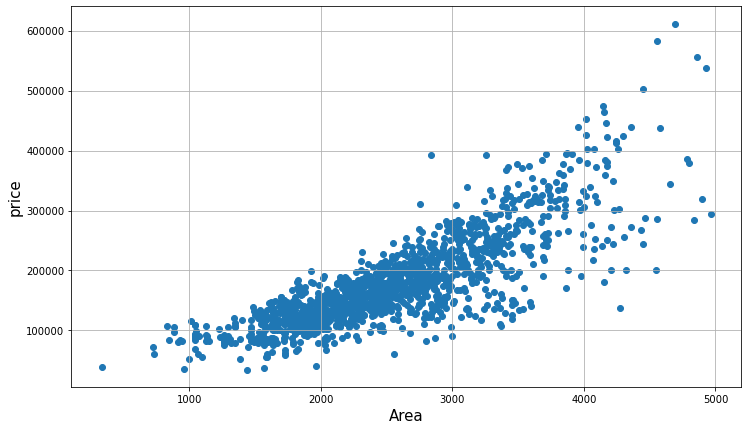

In [3]:
# figure size
plt.figure(figsize=(12,7))

# plot price as a function of toal area
plt.scatter(data['TotalArea'],data['SalePrice'])

# axis labels
plt.xlabel('Area', fontsize=15)
plt.ylabel('price', fontsize=15)

# axis grid
plt.grid(True)

In [4]:
# feature matrix X
m = len(data) # number of data points
X = np.ones((m,2)) # the matrix X
X[:,1] = data['TotalArea'].to_numpy()

# target vector y
y = data['SalePrice'].to_numpy()

In [5]:
# Fit a linear model
theta = np.linalg.lstsq(X,y,rcond=None)[0]
theta

array([-30278.18262358,     82.39324266])

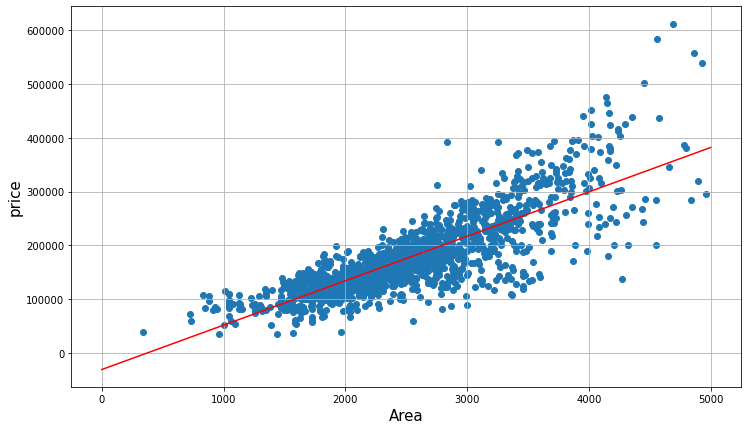

In [6]:
# plot data points + fitted model

# figure size
plt.figure(figsize=(12,7))

# plot price as a function of toal area
plt.scatter(data['TotalArea'],data['SalePrice']) # scatter plot

# axis labels
plt.xlabel('Area', fontsize=15)
plt.ylabel('price', fontsize=15)

# axis grid
plt.grid(True)

# plot fitted model
m_plot = 100
x_plot = np.linspace(0,5000,m_plot)
y_plot = theta[0] + theta[1]*x_plot
plt.plot(x_plot,y_plot,color='red') # line plot

In [7]:
# predictions
y_pred = X.dot(theta)

## Quality of the predictions

In [8]:
# compute the (square root of the) mean squared error
mse = np.mean((y-y_pred)**2)
np.sqrt(mse)

42741.29458002332

According to the MSE, on average, the model is off by 42000 dollars

In [9]:
# compute the absolute mean squared error
mae = np.mean(np.abs(y-y_pred))
mae

30613.53063228153

According to the MAE, on average, the model is off by 30000

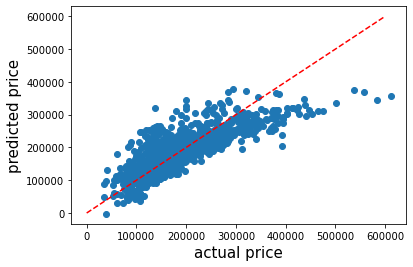

In [10]:
# plot y against y_pred
plt.scatter(y,y_pred)
plt.xlabel('actual price', fontsize=15)
plt.ylabel('predicted price', fontsize=15)

# ideal predictions y = y_pred
plt.plot([0,600000],[0,600000],'--',color='red')

Text(0, 0.5, 'residual')

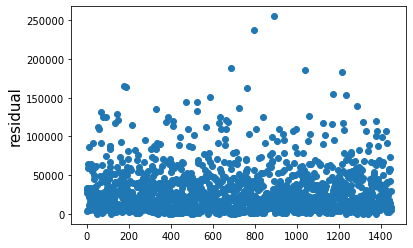

In [11]:
# plot residuals = |y - y_pred|
r = np.abs(y-y_pred)
plt.plot(r,'o')
plt.ylabel('residual',fontsize=15)

## Multiple Linear Regression

**Goal:** predict the price based on total area and construction date

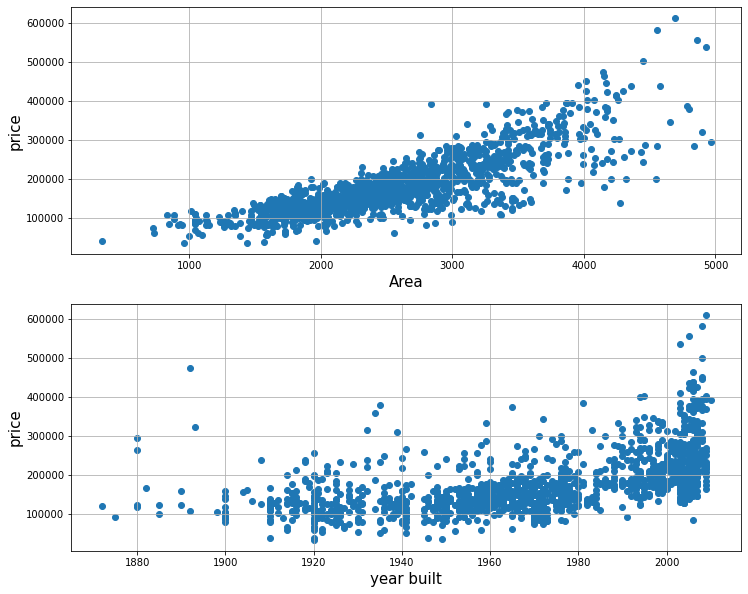

In [12]:
# figure size
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
# plot price as a function of toal area
plt.scatter(data['TotalArea'],data['SalePrice'])

# axis labels
plt.xlabel('Area', fontsize=15)
plt.ylabel('price', fontsize=15)

# axis grid
plt.grid(True)

plt.subplot(2,1,2)
# plot price as a function of toal area
plt.scatter(data['YearBuilt'],data['SalePrice'])

# axis labels
plt.xlabel('year built', fontsize=15)
plt.ylabel('price', fontsize=15)

# axis grid
plt.grid(True)

In [14]:
# feature matrix X
X = np.ones((m,3))
X[:,1] = data['TotalArea'].to_numpy()
X[:,2] = data['YearBuilt'].to_numpy()

In [15]:
# Fit a linear model
theta = np.linalg.lstsq(X,y,rcond=None)[0]
theta

array([-1.39391802e+06,  7.21183228e+01,  7.05057412e+02])

In [16]:
# predictions 
y_pred = X.dot(theta)

In [17]:
# compute the (square root of the) mean squared error
mse = np.mean((y-y_pred)**2)
np.sqrt(mse)

37813.97152147033

In [18]:
# compute the absolute mean squared error
mae = np.mean(np.abs(y-y_pred))
mae

26496.663336385605

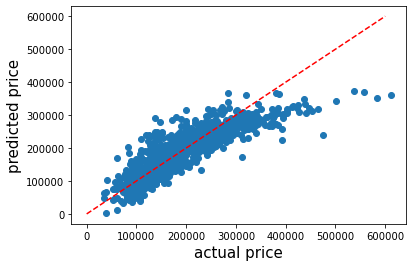

In [19]:
# plot y against y_pred
plt.scatter(y,y_pred)
plt.xlabel('actual price', fontsize=15)
plt.ylabel('predicted price', fontsize=15)

# ideal predictions y = y_pred
plt.plot([0,600000],[0,600000],'--',color='red')

In [20]:
%matplotlib notebook

<IPython.core.display.Javascript object>


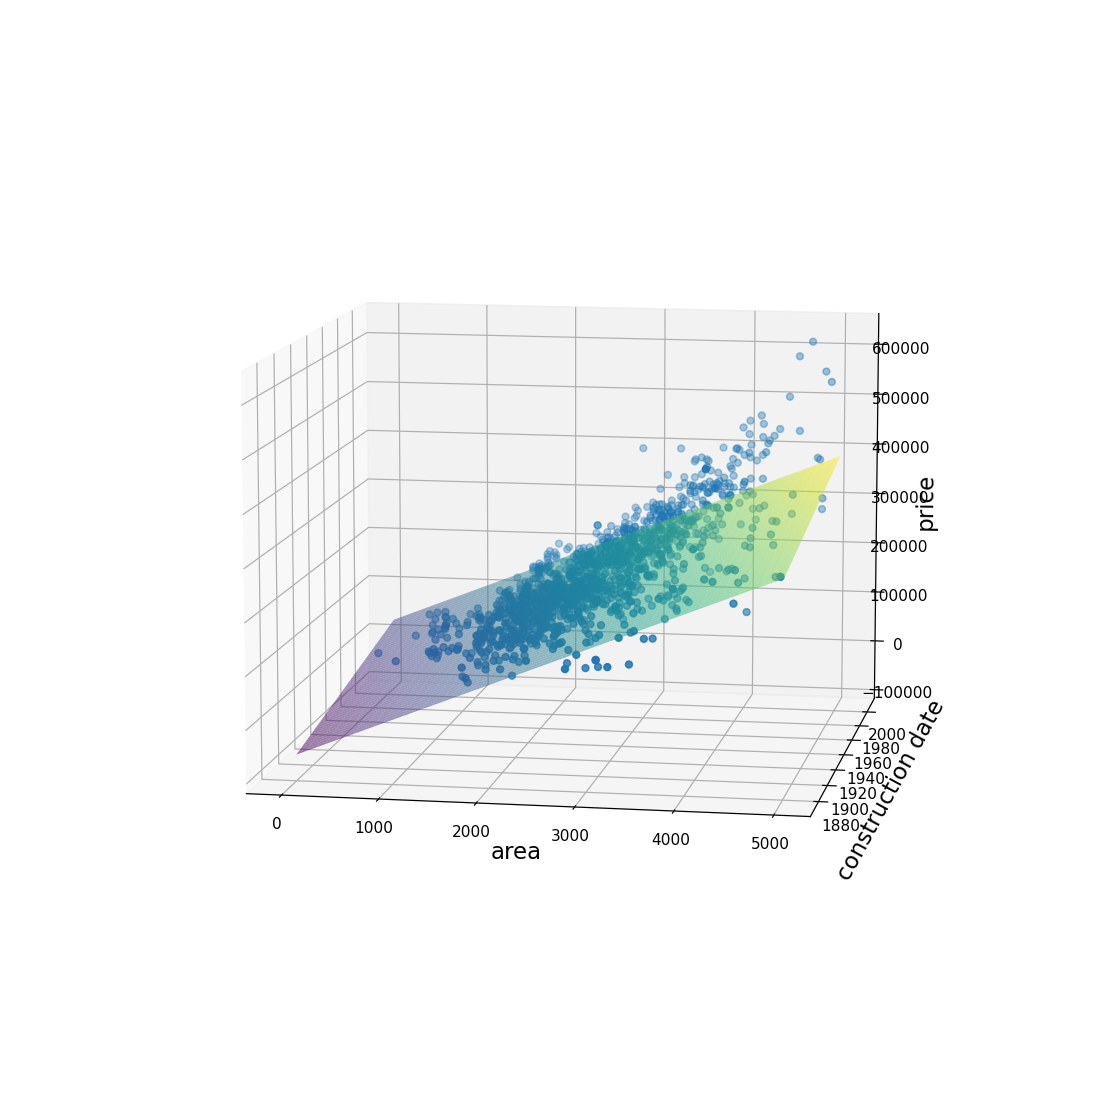

Text(0.5, 0, 'price')

In [21]:
# EXTRA: plot fitted model + data points
fig = plt.figure(figsize=(10,10))
# 3d axes
ax = fig.add_subplot(projection='3d')


# linear model
m_plot = 100
x_plot = np.linspace(0,5000,m_plot)
y_plot = np.linspace(1880,2010,m_plot)
X_plot,Y_plot = np.meshgrid(x_plot,y_plot)
Z_plot = theta[0] + theta[1]*X_plot + theta[2]*Y_plot
ax.plot_surface(X_plot,Y_plot,Z_plot,alpha=0.5,cmap='viridis')#,alpha=0.5,cmap='viridis',rstride=10, cstride=10)

# data points
ax.scatter(data['TotalArea'],data['YearBuilt'],data['SalePrice'])

# change view
ax.view_init(elev=10, azim=-80) 

# axis labels
ax.set_xlabel('area',fontsize=15)
ax.set_ylabel('construction date',fontsize=15)
ax.set_zlabel('price',fontsize=15)